<a href="https://colab.research.google.com/github/ashutosh00009/MACHINE-LEARNING-SUMMER-TRAINING/blob/main/Day_9/Recurrent_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [6]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [8]:
X_train = []
y_train = []
for i in range(200, 1258):
    X_train.append(training_set_scaled[i-200:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [11]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [16]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [20]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 16)

Epoch 1/50
67/67 [==============================] - 23s 350ms/step - loss: 0.0041
Epoch 2/50
67/67 [==============================] - 24s 361ms/step - loss: 0.0047
Epoch 3/50
67/67 [==============================] - 24s 354ms/step - loss: 0.0041
Epoch 4/50
67/67 [==============================] - 23s 349ms/step - loss: 0.0048
Epoch 5/50
67/67 [==============================] - 25s 366ms/step - loss: 0.0034
Epoch 6/50
67/67 [==============================] - 23s 347ms/step - loss: 0.0031
Epoch 7/50
67/67 [==============================] - 23s 343ms/step - loss: 0.0030
Epoch 8/50
67/67 [==============================] - 23s 344ms/step - loss: 0.0033
Epoch 9/50
67/67 [==============================] - 23s 340ms/step - loss: 0.0031
Epoch 10/50
67/67 [==============================] - 23s 342ms/step - loss: 0.0032
Epoch 11/50
67/67 [==============================] - 23s 344ms/step - loss: 0.0031
Epoch 12/50
67/67 [==============================] - 23s 350ms/step - loss: 0.0026
Epoch 13/50
6

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [21]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 200:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(200, 220):
    X_test.append(inputs[i-200:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

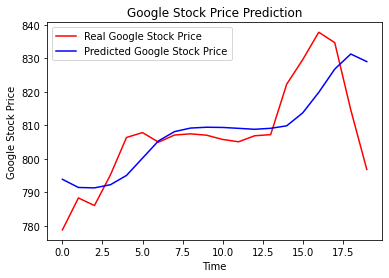

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()